<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


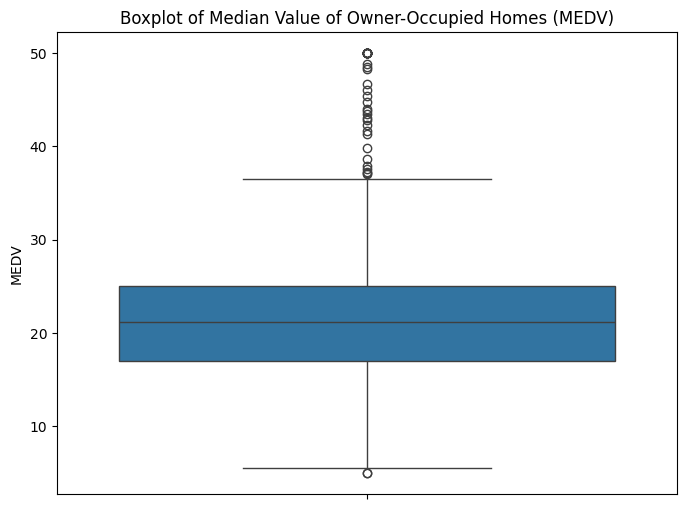

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Boxplot for MEDV
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV')
plt.show()


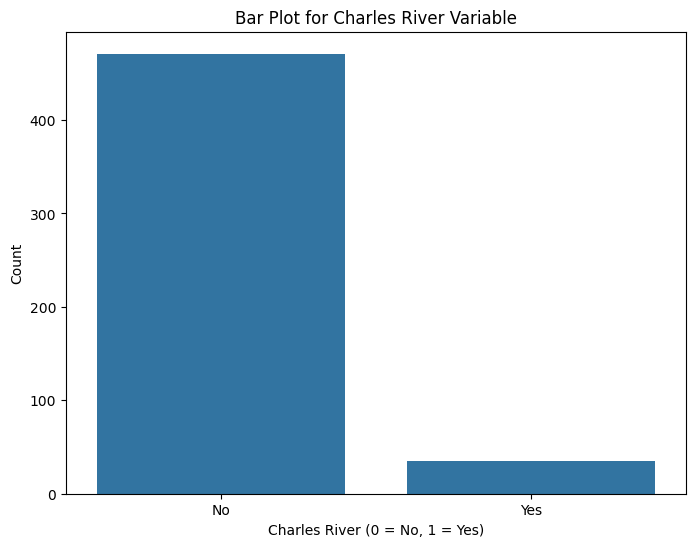

In [7]:
# Bar plot for Charles River variable
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot for Charles River Variable')
plt.xlabel('Charles River (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


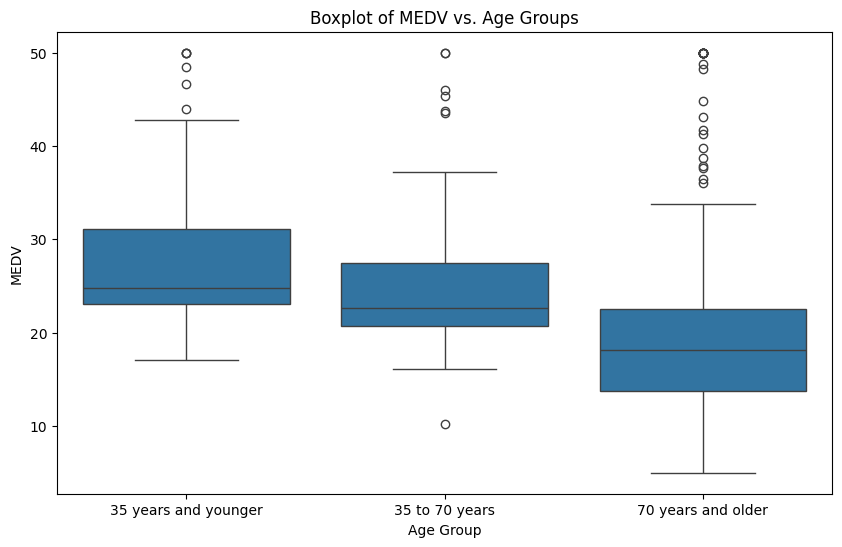

In [8]:
# Discretizing the AGE variable
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['35 years and younger', '35 to 70 years', '70 years and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Boxplot for MEDV vs. AGE_GROUP
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs. Age Groups')
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.show()


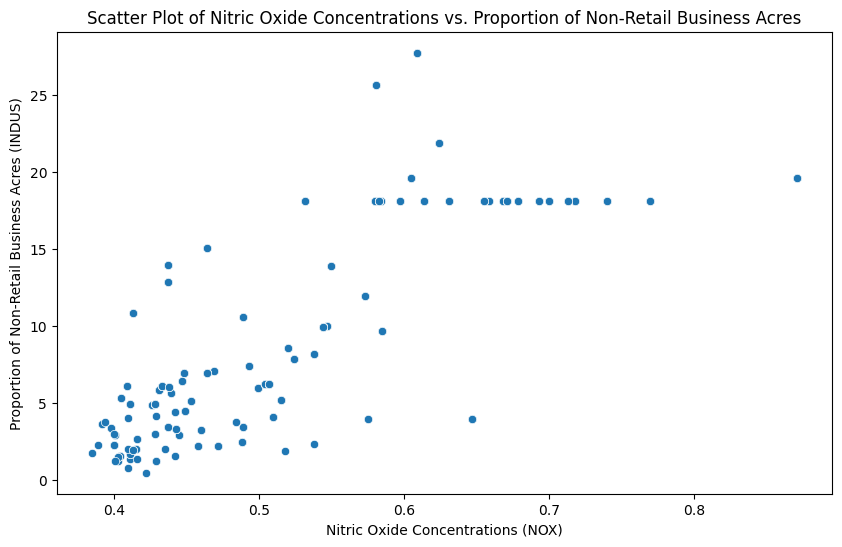

In [9]:
# Scatter plot for NOX vs. non-retail business acres
plt.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()


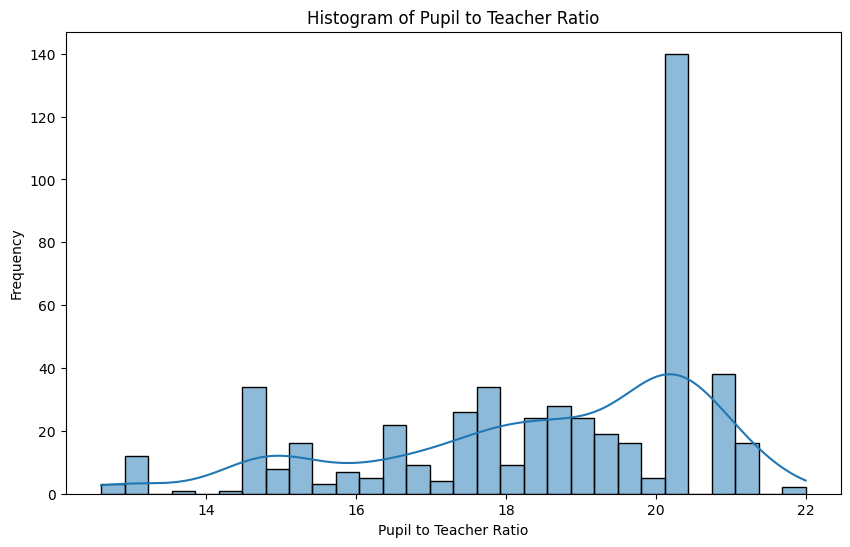

In [10]:
# Histogram for pupil to teacher ratio
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=30, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [11]:
from scipy import stats

# Separate the data
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Houses bounded by Charles River
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Houses not bounded by Charles River

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


In [13]:
# Create groups based on the proportion of owner-occupied units
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', '35 to 70 years', '70 years and older'])

# Perform ANOVA
f_stat, p_value = stats.f_oneway(
    boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '35 to 70 years']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']
)

print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


In [14]:
# Perform Pearson correlation
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Correlation coefficient: {correlation}, P-value: {p_value}")


Correlation coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98


In [15]:
import statsmodels.api as sm

# Define the independent variable (distance) and dependent variable (MEDV)
X = boston_df['DIS']  # Weighted distance to employment centers
y = boston_df['MEDV']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 16 May 2025   Prob (F-statistic):           1.21e-08
Time:                        19:23:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0